In [15]:
"""
Create a sinusoidal function based on three angles, wavelength, and offsets in each dimension.
Evaluate the value of this sinusoid at a point (x, y, z).

# Arguments
- `angles::Tuple{Float64, Float64, Float64}`: Angles (in radians) for each dimension (alpha, beta, gamma).
- `wavelength::Float64`: Wavelength of the sinusoid.
- `offsets::Tuple{Float64, Float64, Float64}`: Offsets in each dimension (offset_x, offset_y, offset_z).
- `x::Float64`: X-coordinate of the point.
- `y::Float64`: Y-coordinate of the point.
- `z::Float64`: Z-coordinate of the point.

# Returns
- `Float64`: Value of the sinusoid at the point (x, y, z).
"""
function evaluate_sinusoid(angles::Tuple{Float64, Float64, Float64}, wavelength::Float64, offsets::Tuple{Float64, Float64, Float64}, x::Float64, y::Float64, z::Float64)::Float64
    alpha, beta, gamma = angles
    offset_x, offset_y, offset_z = offsets

    # Apply offsets to coordinates
    x = x + offset_x
    y = y + offset_y
    z = z + offset_z

    # Compute the sinusoidal function
    sinusoid_value = sin(2 * π / wavelength * (x * cos(alpha) + y * cos(beta) + z * cos(gamma)))

    return sinusoid_value
end

function evaluate_sinusoid_b(angles::Tuple{Float64, Float64, Float64}, wavelength::Float64, offsets::Tuple{Float64, Float64, Float64}, x::Float64, y::Float64, z::Float64)::Float64
    alpha, beta, gamma = angles
    offset_x, offset_y, offset_z = offsets
    p=[ alpha, beta, gamma,wavelength, offset_x, offset_y, offset_z]


    return sin(2 * π / p[4] * ((x+p[5]) * cos(p[1]) + (y+p[6]) * cos(p[2]) + (z+p[7]) * cos(p[3])))+0.0
end


# Example usage
angles = (π/2, π/4, π/7)
wavelength = 1.0
offsets = (1.0, 2.0, 3.0)
x, y, z = 5.0, 5.0, 5.0

value = evaluate_sinusoid(angles, wavelength, offsets, x, y, z)
println("Sinusoid value at point ($x, $y, $z): a $value  b $(evaluate_sinusoid_b(angles, wavelength, offsets, x, y, z))")


Sinusoid value at point (5.0, 5.0, 5.0): a 0.8358018817046964  b 0.8358018817046964


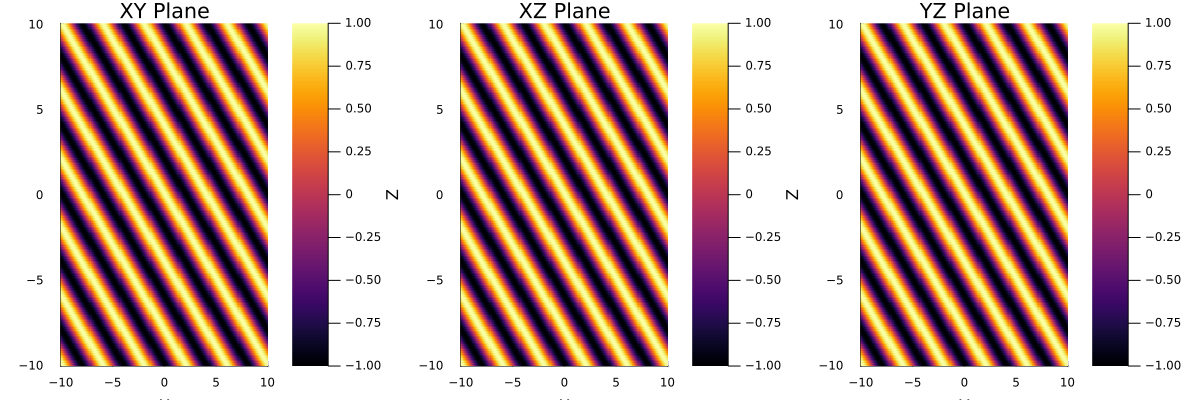

In [17]:
using Plots

# Define the sinusoid evaluation function
function evaluate_sinusoid(angles::Tuple{Float64, Float64, Float64}, wavelength::Float64, offsets::Tuple{Float64, Float64, Float64}, x::Float64, y::Float64, z::Float64)::Float64
    alpha, beta, gamma = angles
    offset_x, offset_y, offset_z = offsets

    # Compute the sinusoidal function
    sinusoid_value = sin(2 * π / wavelength * (x * cos(alpha) + y * cos(beta) + z * cos(gamma) + offset_x + offset_y + offset_z))

    return sinusoid_value
end

# Parameters
angles = (π*2, π*2, π*2)
wavelength = 4.0
offsets = (0.0, 2.0, 3.0)

# Create a 3D grid
x_range = y_range = z_range = -10.0:0.1:10.0
grid_size = length(x_range)
sinusoid_values = zeros(Float64, grid_size, grid_size, grid_size)

# Evaluate the sinusoid function on the 3D grid
for i in 1:grid_size
    for j in 1:grid_size
        for k in 1:grid_size
            x = x_range[i]
            y = y_range[j]
            z = z_range[k]
            sinusoid_values[i, j, k] = evaluate_sinusoid(angles, wavelength, offsets, x, y, z)
        end
    end
end

# Extract slices for each plane
xy_plane = sinusoid_values[:, :, div(grid_size, 2)]
xz_plane = sinusoid_values[:, div(grid_size, 2), :]
yz_plane = sinusoid_values[div(grid_size, 2), :, :]

# Plot the slices
p1 = heatmap(x_range, y_range, xy_plane, title="XY Plane", xlabel="X", ylabel="Y")
p2 = heatmap(x_range, z_range, xz_plane, title="XZ Plane", xlabel="X", ylabel="Z")
p3 = heatmap(y_range, z_range, yz_plane, title="YZ Plane", xlabel="Y", ylabel="Z")

# Display the plots
plot(p1, p2, p3, layout=(1, 3), size=(1200, 400))